# Drug Classification

In this notebook we will be solving the problem of classifying the type of drug from the $5$ drug types given (i.e.):
* drugX
* drugY
* drugC
* drugA
* drugB

This is a *multiclass classification* problem as we have five classes in the target to predict.



<img src = "https://images.theconversation.com/files/358080/original/file-20200915-22-1t5myba.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" width = 600 height = 200>

<br>


**Data Attributes**
* Age
* Sex
* Blood Pressure Levels
* Cholesterol Levels
* Na to Potassium Ratio

**Target Feature**
* Drug Type

Roughly, we will be following the below structure: 

* Load the data.
* Display useful statistics.
* Build generic functions to detect nulls and missing values.
* Handle missing values.
* Make Visualizations to understand data better.
* Build Models

## Table of Contents

* [Import Libraries](#lib)
* [Load Data](#load_data)
* [Summary Statistics](#summary_stats)
* [Identify Missing or Null Values](#missing_values)
* [EDA & Data Visualization](#eda_data_vis)
* [Encoding Categorical Features](#encoding)
* [Developing Classification Models](#model)
* [Evaluating Classification Models](#evaluate)

<a id ='lib'></a>
# Import Libraries

In [47]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'

from IPython.core.display import HTML, display
import warnings
warnings.filterwarnings('ignore')




<a id = 'load_data'></a>
# Load Data

In [48]:
drugs_df = pd.read_csv('drug200.csv')

print(drugs_df.head(10))

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY
5   22   F  NORMAL        HIGH    8.607  drugX
6   49   F  NORMAL        HIGH   16.275  DrugY
7   41   M     LOW        HIGH   11.037  drugC
8   60   M  NORMAL        HIGH   15.171  DrugY
9   43   M     LOW      NORMAL   19.368  DrugY


<a id = 'summary_stats'></a>
## Display summary statistics

In [49]:
# Display column names
print(drugs_df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [50]:
print(drugs_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


This dataset has more categorical features than numerical. So we may have to encode the categorical features.

In [51]:
print(drugs_df.describe())

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000


The maximum or the oldest age give is $74$ and the youngest being $15$

<a id = 'missing_values'></a>
# Investigating Missing Values

In [52]:
# Generic function to calculate missing values, zero values
def calcMissingValues(df: pd.DataFrame):
    '''
    Function to calculate zero,missing and empty values in the dataframe
    
    '''
    # Calculate zero values
    zero_values = (df == 0.0).astype(int).sum(axis = 0)
    
    # Calculate missing values
    missing_vals = df.isnull().sum()
    
    missing_val_percent = round((missing_vals / len(df)) * 100.0 , 2)
    
    df_missing_stat = pd.concat([zero_values , missing_vals , missing_val_percent] , axis = 1)
    
    df_missing_stat = df_missing_stat.rename(columns = {0: 'zero_values' , 1: 'missing_vals' , 2: '%_missing_vals'})
    
    df_missing_stat['data_types'] = df.dtypes
    
    print(df_missing_stat)
    
    
    

In [53]:
calcMissingValues(drugs_df)

             zero_values  missing_vals  %_missing_vals data_types
Age                    0             0             0.0      int64
Sex                    0             0             0.0     object
BP                     0             0             0.0     object
Cholesterol            0             0             0.0     object
Na_to_K                0             0             0.0    float64
Drug                   0             0             0.0     object


As seen, the dataset is clean without any missing values to impute.

<a id = 'eda_data_vis'> </a>
# EDA & Data Visualization

#### Visualize **Age** versus **Drug Type**
* Stripplot
* Boxplot

**Stripplot**

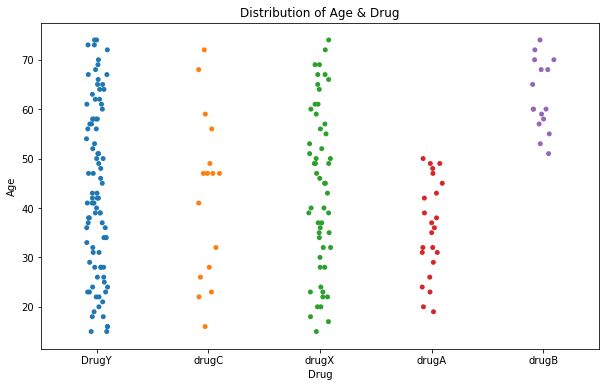

In [54]:
# Visualize age and drug type using strip plot
plt.figure(figsize = (10 , 6))
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Age' , data = drugs_df)
plt.title('Distribution of Age & Drug')
plt.show()



The stripplot is used to visualize multiple data distributions, from the plot it looks like *DrugY* and *drugX* are more commonly prescribed or used by the populace.

**Box Plot**

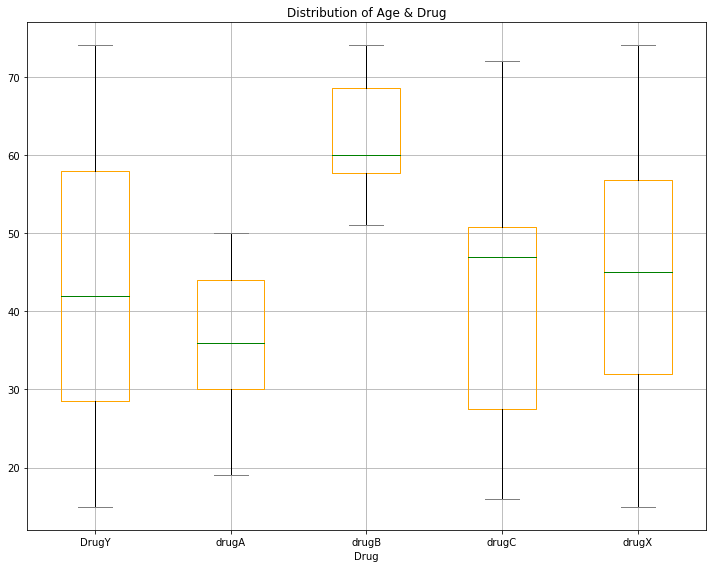

In [55]:
# Visualize age and drug type using Box plot

props = dict(boxes = "orange", whiskers="black", medians= "green", caps ="Gray")
drugs_df.boxplot(by = 'Drug' , column = ['Age'] , figsize = (10 , 8) , color = props )
plt.title('Distribution of Age & Drug')
plt.suptitle("")
plt.tight_layout()
plt.show()

This confirms our assumption that *DrugY* and *drugX* are most commonly used

### Visualize target variable **Drug**

We now visualize the distribution of the target variable to see if there are any imbalances in class distribution as this is a multiclass classification and any imbalances might affect the outcome.

There will be two plots:
* Bar plot
* Pie Chart

**Bar Plot**

['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


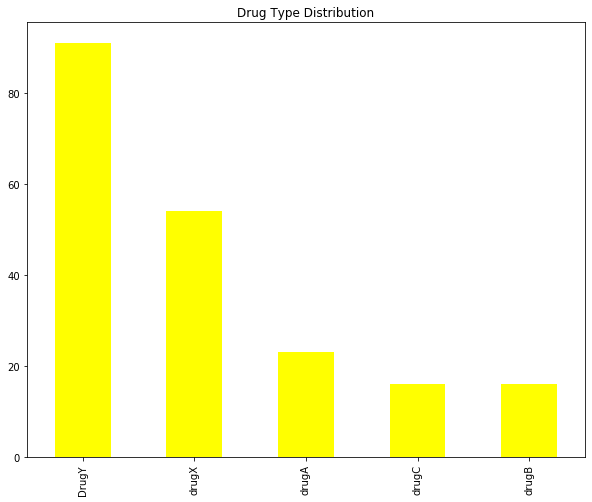

In [56]:
# Get unique class values
print(drugs_df['Drug'].unique())

# Plot a bar chart of the various classes
drugs_df['Drug'].value_counts().plot(kind = 'bar' , x = 'Drug Type' , y = 'Drug Type Count' , color = 'yellow' , figsize = (10 , 8))
plt.title('Drug Type Distribution')
plt.show()

**Pie Chart**

Drug
DrugY    91
drugA    23
drugB    16
drugC    16
drugX    54
dtype: int64


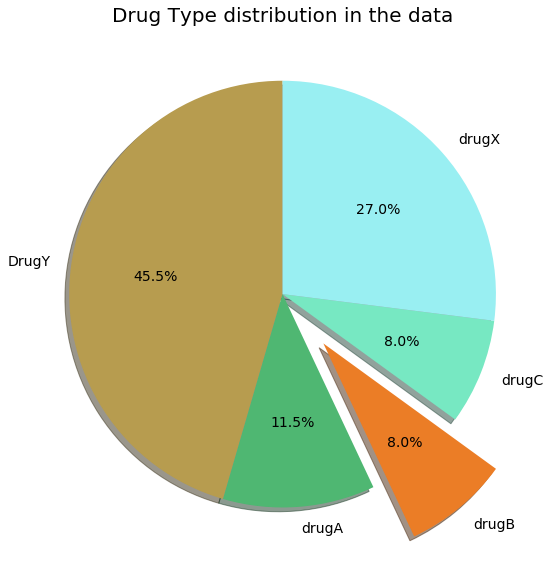

In [57]:
print(drugs_df.groupby(['Drug']).size())

drug_type = drugs_df.groupby(['Drug']).size()

sizes = list(drugs_df.groupby(['Drug']).size())

labels = ['Bachelors' , 'Below Secondary', 'Masters']

pie_chart_drug = {'labels': list(drug_type.index.values) , 'vals': sizes}


# print(drug_type.index.values)
# print(sizes)

colors = ['#b79c4f', '#4fb772', '#eb7d26' , '#77e8c2' , '#99eff2']

#print(pie_chart_drug)
# colors = ['#ff9999','#1f70f0','#99ff99']
pie_explode = [0 , 0 , 0.3 , 0 , 0]

plt.figure(figsize = (10 , 8))
plt.pie(pie_chart_drug['vals'] , labels = pie_chart_drug['labels'] , explode = pie_explode , colors = colors , shadow = True, startangle = 90 , textprops={'fontsize': 14} , autopct = '%.1f%%')
plt.ylabel('')
plt.title('Drug Type distribution in the data' , fontsize = 20)
plt.tight_layout()
plt.show()

From the two plots we see the distribution of *drugA*, *drugB* and *drugC* is relatively lower. This may affect the prediction and based on the accuracy metrics we can use **SMOTE** to oversample classes having lower distributions

### Visualize **Gender** and **Drug**

  Sex   Drug  value_count
0   F  DrugY           47
1   F  drugA            9
2   F  drugB            6
3   F  drugC            7
4   F  drugX           27
5   M  DrugY           44
6   M  drugA           14
7   M  drugB           10
8   M  drugC            9
9   M  drugX           27
Sex     F   M
Drug         
DrugY  47  44
drugA   9  14
drugB   6  10
drugC   7   9
drugX  27  27


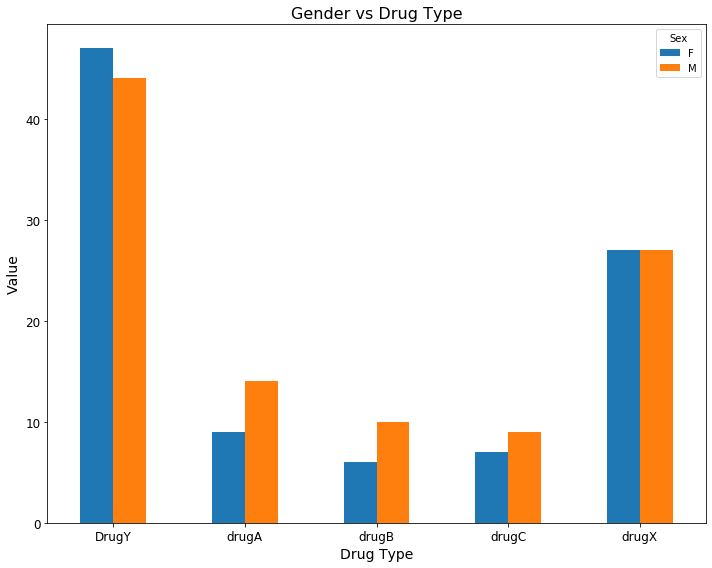

In [58]:
gender_drug = drugs_df.groupby(['Sex' , 'Drug']).size().reset_index(name = 'value_count')

print(gender_drug)

gender_drug_pivot = pd.pivot_table(
    gender_drug, 
    values = 'value_count',
    index = 'Drug',
    columns = 'Sex'
)

# aggfunc=np.mean


print(gender_drug_pivot)

gender_drug_pivot.plot(kind = 'bar' , figsize = (10 , 8) , fontsize = 12 , rot = 360)
plt.xlabel('Drug Type', fontsize = 14)
plt.ylabel('Value' , fontsize = 14)
plt.title('Gender vs Drug Type', fontsize = 16)
plt.tight_layout()
plt.show()

Nothing substantial can be interpreted from plotting Gender vs Drug. There is no bias towards genders for any specific type of Drug.

## Visualize **BP** and **Drug**

Ploltting to see if there is any relation between BP and Drug type. The chart will be a gouped bar chart.

             Age    Na_to_K
Drug                       
DrugY  43.747253  22.374780
drugA  35.869565  10.918783
drugB  62.500000  11.524375
drugC  42.500000  10.633750
drugX  44.018519  10.650556
['HIGH' 'LOW' 'NORMAL']
              Age    Na_to_K
BP                          
HIGH    42.233766  17.040623
LOW     47.031250  16.539797
NORMAL  44.084746  14.342746
       BP   Drug  value_count
0    HIGH  DrugY           38
1    HIGH  drugA           23
2    HIGH  drugB           16
3     LOW  DrugY           30
4     LOW  drugC           16
5     LOW  drugX           18
6  NORMAL  DrugY           23
7  NORMAL  drugX           36


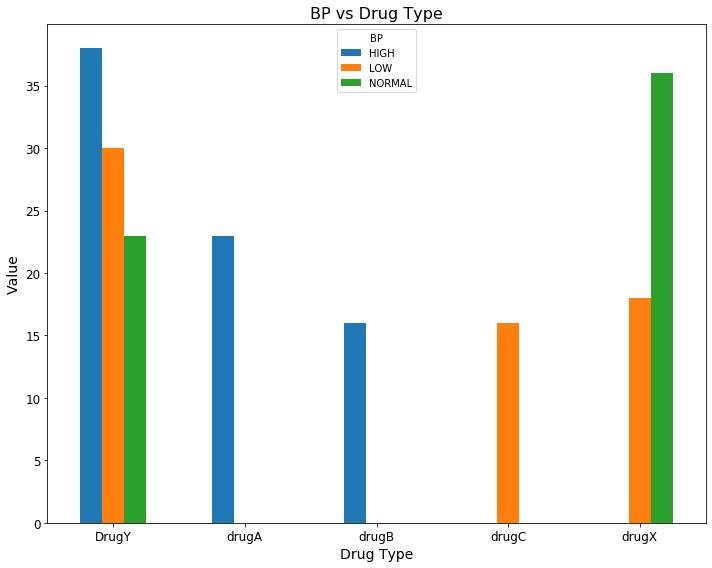

In [59]:
print(drugs_df.groupby(['Drug']).mean())

print(drugs_df['BP'].unique())

print(drugs_df.groupby(['BP']).mean())

bp_drug = drugs_df.groupby(['BP' , 'Drug']).size().reset_index(name = 'value_count')

print(bp_drug)

gender_drug_pivot = pd.pivot_table(
    gender_drug, 
    values = 'value_count',
    index = 'Drug',
    columns = 'Sex'
)


bp_drug_pivot = pd.pivot_table(bp_drug , values = 'value_count' , columns = 'BP' , index = 'Drug')


bp_drug_pivot.plot(kind = 'bar' , figsize = (10 , 8) , fontsize = 12 , rot = 360)
plt.xlabel('Drug Type', fontsize = 14)
plt.ylabel('Value' , fontsize = 14)
plt.title('BP vs Drug Type', fontsize = 16)
plt.tight_layout()
plt.show()


A majority of normal BP take DrugX and those with a higher BP take predominantly DrugY with Drug A and Drug B being close contenders.

## Visualize **Na_to_K** and **Drug**

     Na_to_K   Drug
0     25.355  DrugY
1     13.093  drugC
2     10.114  drugC
3      7.798  drugX
4     18.043  DrugY
..       ...    ...
195   11.567  drugC
196   12.006  drugC
197    9.894  drugX
198   14.020  drugX
199   11.349  drugX

[200 rows x 2 columns]
Drug
DrugY    22.374780
drugA    10.918783
drugB    11.524375
drugC    10.633750
drugX    10.650556
Name: Na_to_K, dtype: float64


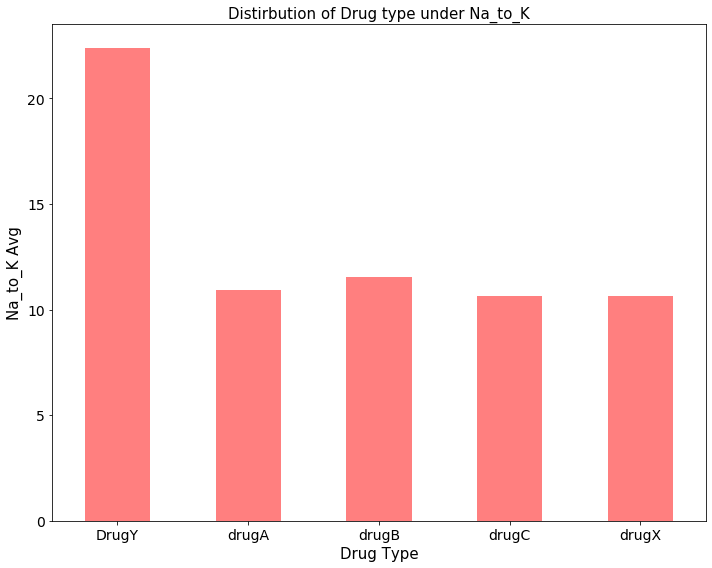

In [60]:
print(drugs_df[['Na_to_K' , 'Drug']])

drug_na_k = drugs_df.groupby(['Drug'])['Na_to_K'].mean()

print(drug_na_k)

drug_na_k.plot(kind = 'bar' , color = 'red' , alpha = 0.5 , rot = 360 , fontsize = 14 , figsize = (10 , 8))
plt.xlabel('Drug Type' , fontsize = 15)
plt.ylabel('Na_to_K Avg' , fontsize = 15)
plt.title('Distirbution of Drug type under Na_to_K' , fontsize = 15)
plt.tight_layout()
plt.show()

The bar chart tells that if the average Na_to_K value exceeds15 then DrugY is preffered and so this feature also plays an important role in classification. We can view the joint distribution of variables in Stripplot.

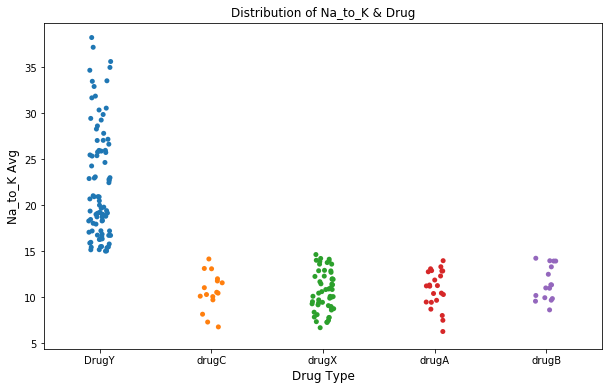

In [61]:
# Visualize Na_to_K and drug type using strip plot
plt.figure(figsize = (10 , 6))
# Plotting a swarmplot to get a distribution of categorical and numerical variables
sns.stripplot(x = 'Drug' , y = 'Na_to_K' , data = drugs_df)
plt.xlabel('Drug Type' , fontsize = 12)
plt.ylabel('Na_to_K Avg' , fontsize = 12)
plt.title('Distribution of Na_to_K & Drug')
plt.show()


<a id = 'encoding'></a>
## Encoding Categorical Features

In [62]:
# Get all non-numerical columns
print(drugs_df.select_dtypes(exclude=["number","bool_"]))

    Sex      BP Cholesterol   Drug
0     F    HIGH        HIGH  DrugY
1     M     LOW        HIGH  drugC
2     M     LOW        HIGH  drugC
3     F  NORMAL        HIGH  drugX
4     F     LOW        HIGH  DrugY
..   ..     ...         ...    ...
195   F     LOW        HIGH  drugC
196   M     LOW        HIGH  drugC
197   M  NORMAL        HIGH  drugX
198   M  NORMAL      NORMAL  drugX
199   F     LOW      NORMAL  drugX

[200 rows x 4 columns]


### Label Encoding
We can use label encoding for the *Sex* as there is no problem of precedance or hierarchy.
The target feature need not be encoded as scikit-learn encodes by default if the target values are strings.

The following columns will be label encoded:
* Sex

In [63]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

In [64]:
# Make a copy of the dataset
drugs_train_df = drugs_df.copy()
#drugs_temp = drugs_train_df.copy()

In [65]:
drugs_train_df['Sex'] = labelEncoder.fit_transform(drugs_train_df['Sex'])
#drugs_temp['BP'].sort_values() = labelEncoder.fit_transform(drugs_temp['BP'])
#print(drugs_temp.loc[0 : 5, 'BP'].sort_values(ascending = True))
print(drugs_train_df.loc[0 : 5, 'Sex'])
print(drugs_df.loc[0 : 5, 'Sex'])

0    0
1    1
2    1
3    0
4    0
5    0
Name: Sex, dtype: int32
0    F
1    M
2    M
3    F
4    F
5    F
Name: Sex, dtype: object


### Ordinal Encoding

Columns *BP* and *Cholesterol* are odrdinal in nature as they have an order of sorts (i.e.) LOW, NORMAL and HIGH, we can use pandas map function to ordinally encode these variables.

The following columns will be label encoded:
* BP
* Cholesterol

In [66]:
# Get the unique values
print('BP: ', drugs_train_df['BP'].unique())
print('Cholesterol: ', drugs_train_df['Cholesterol'].unique())

BP:  ['HIGH' 'LOW' 'NORMAL']
Cholesterol:  ['HIGH' 'NORMAL']


In [67]:
# Define a map function
ord_dict = {'LOW': 1 , 'NORMAL' : 2, 'HIGH' : 3}
#chol_dict = {}
drugs_train_df['BP'] = drugs_train_df['BP'].map(ord_dict)
drugs_train_df['Cholesterol'] = drugs_train_df['Cholesterol'].map(ord_dict)

In [68]:
print('BP: ', drugs_train_df['BP'].unique())
print('Cholesterol: ', drugs_train_df['Cholesterol'].unique())

BP:  [3 1 2]
Cholesterol:  [3 2]


In [69]:
print(drugs_train_df)

     Age  Sex  BP  Cholesterol  Na_to_K   Drug
0     23    0   3            3   25.355  DrugY
1     47    1   1            3   13.093  drugC
2     47    1   1            3   10.114  drugC
3     28    0   2            3    7.798  drugX
4     61    0   1            3   18.043  DrugY
..   ...  ...  ..          ...      ...    ...
195   56    0   1            3   11.567  drugC
196   16    1   1            3   12.006  drugC
197   52    1   2            3    9.894  drugX
198   23    1   2            2   14.020  drugX
199   40    0   1            2   11.349  drugX

[200 rows x 6 columns]


Now the data does not lose its meaning since we have done ordinal encoding of the key feature columns.

<a id = 'model'></a>
## Building Classification models

**Split into Trian and Test data**

In [70]:
# Number of records
print(drugs_train_df.shape)

(200, 6)


In [71]:
def splitDataset(x_df: pd.DataFrame , y_df: pd.DataFrame)-> (pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
        
        '''
        Function to split a dataset into Train and test sets
        
        '''
        
        ratio = 0.8
        
        mask = np.random.rand(len(x_df)) <= ratio
        
        x_train = x_df[mask]
        x_test = x_df[~mask]
        
        y_train = y_df[mask]
        y_test = y_df[~mask]
        
        
        return x_train, y_train, x_test, y_test
        

In [72]:
np.random.seed(123)

y_df = drugs_train_df['Drug']
x_df = drugs_train_df.drop(['Drug'] , axis = 1)

x_train, y_train, x_test, y_test = splitDataset(x_df , y_df)

print('X Train Shape: ', x_train.shape)
print('X Test Shape: ', x_test.shape)
print('Y Train Shape: ', y_train.shape)
print('Y Test Shape: ', y_test.shape)

X Train Shape:  (166, 5)
X Test Shape:  (34, 5)
Y Train Shape:  (166,)
Y Test Shape:  (34,)


### Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
# Define the model
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(x_train , y_train)

y_pred = logistic_regression.predict(x_test)

In [75]:
# Get scores
train_score = logistic_regression.score(x_train , y_train)
test_score = logistic_regression.score(x_test , y_test)

In [76]:
print('Train score: {:.2f}'.format(train_score))
print('Test score: {:.2f}'.format(test_score))

Train score: 0.86
Test score: 0.82


<a id= "evaluate"></a>
## Evaluating Classification Models

In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score
from sklearn.metrics import classification_report

**Confusion Matrix**

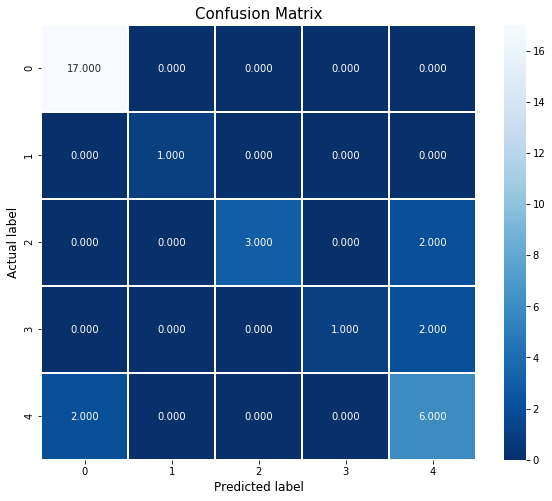

In [78]:
conf_matrix = confusion_matrix(y_test , y_pred)

# print(conf_matrix)

plt.figure(figsize = (10, 8))
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", linewidths =.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label' , fontsize = 12)
plt.xlabel('Predicted label' , fontsize = 12)
plt.title('Confusion Matrix' , fontsize = 15)
plt.show()

**Precision, Recall and F1-Score**

In [79]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.89      1.00      0.94        17
       drugA       1.00      1.00      1.00         1
       drugB       1.00      0.60      0.75         5
       drugC       1.00      0.33      0.50         3
       drugX       0.60      0.75      0.67         8

    accuracy                           0.82        34
   macro avg       0.90      0.74      0.77        34
weighted avg       0.85      0.82      0.81        34



The **Recall** score for the various classes are high which is a good indicator that the model is predicting a positive case when the actual value is also true. Recall tells from all the positive cases how many were predicted correctly

$recall = \frac{TP}{TP + FN} $


Precision tells about predicting positive classes when the result is actually positive and the scores look good.

$precision = \frac{TP}{TP + FP}$


**Classification Error or Misclassification Rate**

This tells overall how often the classification is incorrect.

$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

$classification{\_}error = \frac{FP + FN}{TP + TN + FP + FN}$

$classification{\_}error = 1 - accuracy$

In [80]:
# Get accuracy score
acc = accuracy_score(y_test , y_pred)
print('Accuracy: {:.2f}'.format(acc))

class_err = 1 - acc
print('Misclassification rate: {:.2f}'.format(class_err))

Accuracy: 0.82
Misclassification rate: 0.18


The misclassification rate is quite low and this makes the model a decent predictor of different drug types. We can also improve the model performance by performing Hyperparameter tuning using GridSearchCV, but that will be useful on a bigger dataset.